In [17]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 5.2 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 5.1 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 5.2 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 5.2 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 5.2 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.1 MB/s  0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------ --------------------- 1.0/2.3 MB 5.2 MB/s eta 0:00:0

In [6]:
!pip install numpy

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.8 MB 5.3 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/12.8 MB 5.3 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/12.8 MB 5.3 MB/s eta 0:00:02
   ------------- -------------------------- 4.2/12.8 MB 5.3 MB/s eta 0:00:02
   ---------------- ----------------------- 5.2/12.8 MB 5.3 MB/s eta 0:00:02
   ------------------- -------------------- 6.3/12.8 MB 5.3 MB/s eta 0:00:02
   ---------------------- ----------------- 7.3/12.8 MB 5.3 MB/s eta 0:00:02
   --------------------------- ------------ 8.7/12.8 MB 5.3 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.8 MB 5.3 MB/s eta 0:00:01
   --------------------------------- ------ 10.7/12.8 MB 5.3 MB/s eta 0:00:01
   ------------------------------------ --- 11.8/12.8 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 5.3 MB/s  0:00:02


hind1 and hind2 are integer arrays that store the row and column indices of the nonzero entries in the sparse Hamiltonian matrix.
•	ham2[i] is the value of the i-th nonzero entry in the Hamiltonian.
•	hind1[i] is the row index of that entry.
•	hind2[i] is the column index of that entry.

## TFIM

In [19]:
import numpy as np

# Example: opening a text file in read mode
file_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\ED\TFIM1Ham.txt"

with open(file_path, "r") as f:
    data = f.read()

# Load with correct dtype
data = np.loadtxt(file_path, dtype=float)

# Separate into row, col, val
rows = data[:,0].astype(int)   # convert to 0-based
cols = data[:,1].astype(int)
vals = data[:,2]

# print("data:", data)
# print("rows:", rows)
# print("columns:", cols)
# Matrix size (assuming square)
phys_N = 10           # number of spins
dim = 2**phys_N      # Hilbert space dimension

M = np.zeros((dim, dim))
M[rows, cols] = vals

print("Matrix shape:", M.shape)

# (Optional) enforce exact Hermiticity if there are tiny asymmetries from IO
# M = 0.5 * (M + M.T.conj())

np.set_printoptions(precision=3, suppress=True)  # 3 decimals, no scientific notation
# print(M)
spectra = []
gaps = []

# Diagonalize with numpy (returns all eigenvalues)
evals, evecs = np.linalg.eigh(M)

# Sort eigenvalues (np.linalg.eigh usually gives them sorted already, but let's be safe)
evals = np.sort(evals)

# Take the lowest 4 eigenvalues
lowest_4 = evals[:4]

spectra.append(lowest_4)
gaps.append(lowest_4[3] - lowest_4[2])   # gap = E2 - E0

print("Lowest 4 eigenvalues:", lowest_4)
print("Gap (E2 - E0):", gaps[-1])


Matrix shape: (1024, 1024)
Lowest 4 eigenvalues: [-2.506 -1.606 -1.532 -1.532]
Gap (E2 - E0): 0.0


In [25]:
import numpy as np
import os
ns=5
def compute_gap(index, phys_N=ns, base_path=r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\ED"):
    """
    Compute the spectral gap (E2 - E0) for TFIM Hamiltonian with given index.

    Parameters
    ----------
    index : int
        File index, e.g. 1 -> TFIM1Ham.txt
    phys_N : int
        Number of spins in the system (default=6)
    base_path : str
        Path to directory containing TFIM*.txt files

    Returns
    -------
    gap : float
        Energy gap (E2 - E0)
    lowest_4 : np.ndarray
        The lowest 4 eigenvalues
    """
    file_path = os.path.join(base_path, f"TFIM{index}Ham.txt")

    # Load data (row, col, val)
    data = np.loadtxt(file_path, dtype=float)
    rows = data[:,0].astype(int)
    cols = data[:,1].astype(int)
    vals = data[:,2]

    # Hilbert space dimension
    dim = 2**phys_N
    M = np.zeros((dim, dim))
    M[rows, cols] = vals

    # Diagonalize
    evals, evecs = np.linalg.eigh(M)
    evals = np.sort(evals)
    lowest_4 = evals[:6]

    gap = lowest_4[3] - lowest_4[2]
    return gap, lowest_4, M, evecs

# Example: loop over multiple files
for idx in range(10, 11):  # TFIM1Ham.txt, TFIM2Ham.txt, TFIM3Ham.txt
    gap, lowest_4, M, evecs = compute_gap(idx, phys_N=ns)
    print(idx)
    print(f"TFIM{idx}Ham: gap = {gap:.6f}, lowest 4 eigenvalues = {lowest_4}")

print(M)

10
TFIM10Ham: gap = 0.097887, lowest 4 eigenvalues = [-3.236 -3.078 -2.    -1.902 -1.902 -1.176]
[[-2.5 -0.5 -0.5 ...  0.   0.   0. ]
 [-0.5 -0.5  0.  ...  0.   0.   0. ]
 [-0.5  0.  -0.5 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ... -0.5  0.  -0.5]
 [ 0.   0.   0.  ...  0.  -0.5 -0.5]
 [ 0.   0.   0.  ... -0.5 -0.5 -2.5]]


In [15]:
evals, evecs = np.linalg.eigh(M)
# # print(evals)
# # print(evecs)
idxs = np.argsort(evals)
lowest_evals = evals[idxs][:4]
lowest_vecs = evecs[:, idxs][:, :4]   # take first 4 eigenvectors
# print(lowest_evals)
# print(lowest_vecs)

def state_to_distribution(state, n_qubits, cutoff=0.0):
    """
    Return computational basis states with probability > cutoff.
    """
    state = np.array(state).flatten()
    probs = np.abs(state)**2
    dist = {}
    for i, p in enumerate(probs):
        if p > cutoff:
            dist[format(i, f'0{n_qubits}b')] = float(p)
    return dist

for i in range(4):
    print(f"Eigenvalue {lowest_evals[i]:.3f} -> {state_to_distribution(lowest_vecs[:, i], ns)}")


Eigenvalue -3.236 -> {'00000': 0.2960042485937342, '00001': 0.02565983005625032, '00010': 0.025659830056250325, '00011': 0.011840169943749404, '00100': 0.025659830056250336, '00101': 0.0032991502812526104, '00110': 0.01184016994374941, '00111': 0.011840169943749486, '01000': 0.025659830056250336, '01001': 0.0032991502812526074, '01010': 0.0032991502812526083, '01011': 0.0032991502812526274, '01100': 0.011840169943749422, '01101': 0.0032991502812526274, '01110': 0.011840169943749479, '01111': 0.025659830056250665, '10000': 0.025659830056250346, '10001': 0.011840169943749413, '10010': 0.0032991502812526083, '10011': 0.011840169943749482, '10100': 0.0032991502812526113, '10101': 0.0032991502812526287, '10110': 0.0032991502812526274, '10111': 0.025659830056250665, '11000': 0.011840169943749422, '11001': 0.011840169943749488, '11010': 0.0032991502812526295, '11011': 0.025659830056250672, '11100': 0.011840169943749491, '11101': 0.025659830056250665, '11110': 0.025659830056250665, '11111': 0.

In [89]:
print(ns)
print(1/np.sqrt(2**10))

8
0.03125


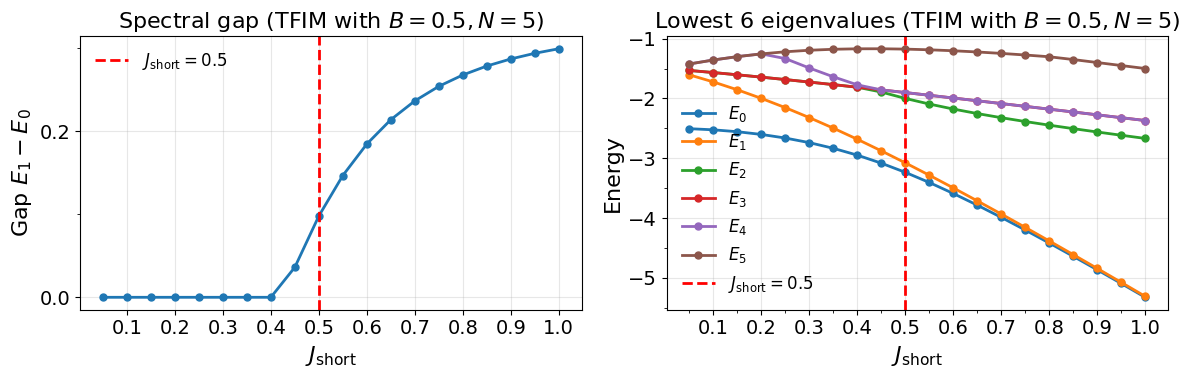

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

indices = range(1, 21)   # TFIM1Ham .. TFIM10Ham
gaps = []
spectra = []   # to store lowest eigenvalues

for idx in indices:
    gap, lowest_4, _ ,_= compute_gap(idx, phys_N=ns)
    gaps.append(gap)
    spectra.append(lowest_4)   # save the spectrum

parameterN5 = np.array(indices) /20
spectraN5 = np.array(spectra)   # shape: (num_indices, 4)


plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "lines.linewidth": 2,
    "lines.markersize": 5,
})


fig, axes = plt.subplots(1, 2, figsize=(12,4))  # 1 row, 2 columns

# --- Left panel: gap ---
ax = axes[0]
ax.plot(parameterN5, gaps, marker="o", linestyle="-", color="C0")
ax.axvline(x=0.5, color="red", linestyle="--", linewidth=2, label=r"$J_{\mathrm{short}}=0.5$")
ax.set_xlabel(r"$J_{\mathrm{short}}$")
ax.set_ylabel(r"Gap $E_1 - E_0$")
ax.set_title(rf"Spectral gap (TFIM with $B=0.5, N={ns}$)")
ax.legend(frameon=False, loc="best")
ax.grid(True, alpha=0.3)

ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

# --- Right panel: spectrum ---
ax = axes[1]
for i in range(spectraN5.shape[1]):
    ax.plot(parameterN5, spectraN5[:, i], marker="o", linestyle="-", label=rf"$E_{i}$")
ax.axvline(x=0.5, color="red", linestyle="--", linewidth=2, label=r"$J_{\mathrm{short}}=0.5$")
ax.set_xlabel(r"$J_{\mathrm{short}}$")
ax.set_ylabel("Energy")
ax.set_title(rf"Lowest 6 eigenvalues (TFIM with $B=0.5, N={ns}$)")
ax.legend(frameon=False, loc="best")
ax.grid(True, alpha=0.3)

ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

plt.tight_layout()
plt.savefig("TFIM_combined12.pdf")   # save both panels into one PDF
plt.show()

## LFIM Alpha=0

In [27]:
import numpy as np
import os
ns=10
def compute_gap(index, phys_N=ns, base_path=r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\ED"):
    """
    Compute the spectral gap (E2 - E0) for TFIM Hamiltonian with given index.

    Parameters
    ----------
    index : int
        File index, e.g. 1 -> TFIM1Ham.txt
    phys_N : int
        Number of spins in the system (default=6)
    base_path : str
        Path to directory containing TFIM*.txt files

    Returns
    -------
    gap : float
        Energy gap (E2 - E0)
    lowest_4 : np.ndarray
        The lowest 4 eigenvalues
    """
    file_path = os.path.join(base_path, f"LFIMLRa0{index}Ham.txt")

    # Load data (row, col, val)
    data = np.loadtxt(file_path, dtype=float)
    rows = data[:,0].astype(int)
    cols = data[:,1].astype(int)
    vals = data[:,2]

    # Hilbert space dimension
    dim = 2**phys_N
    M = np.zeros((dim, dim))
    M[rows, cols] = vals

    # Diagonalize
    evals, _ = np.linalg.eigh(M)
    evals = np.sort(evals)
    lowest_4 = evals[:6]

    gap = lowest_4[1] - lowest_4[0]
    return gap, lowest_4

# Example: loop over multiple files
# for idx in range(1, 51):  # TFIM1Ham.txt, TFIM2Ham.txt, TFIM3Ham.txt
#     gap, lowest_4 = compute_gap(idx, phys_N=ns)
#     print(f"LFIMLRa0{idx}Ham: gap = {gap:.6f}, lowest 4 eigenvalues = {lowest_4}")



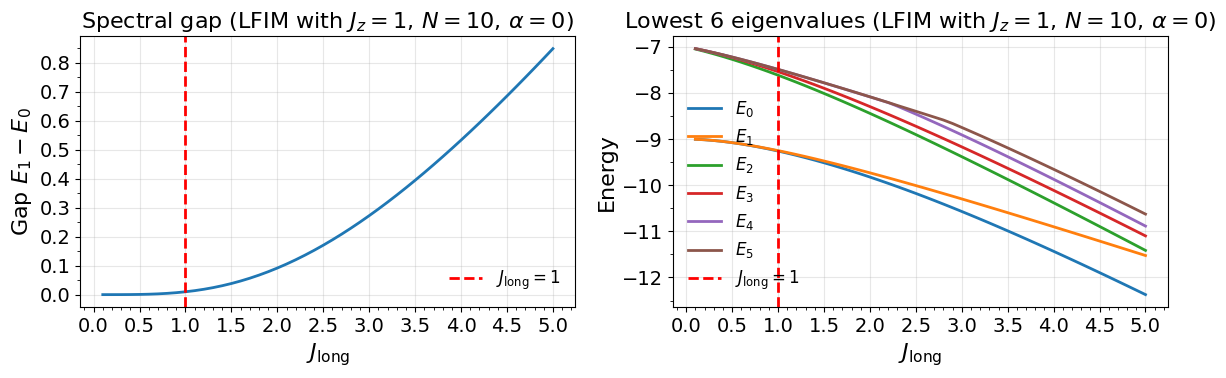

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

indices = range(1, 51)   # TFIM1Ham .. TFIM10Ham
gaps = []
spectra = []   # to store lowest eigenvalues

for idx in indices:
    gap, lowest_4 = compute_gap(idx, phys_N=10)
    gaps.append(gap)
    spectra.append(lowest_4)   # save the spectrum

parameter = np.array(indices) / 10
spectra = np.array(spectra)   # shape: (num_indices, 4)


plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "lines.linewidth": 2,
    "lines.markersize": 5,
})

fig, axes = plt.subplots(1, 2, figsize=(12,4))  # 1 row, 2 columns

# --- Left panel: gap ---
ax = axes[0]
ax.plot(parameter, gaps, linestyle="-",marker="o", color="C0")
ax.axvline(x=1, color="red", linestyle="--", linewidth=2, label=r"$J_{\mathrm{long}}=1$")
ax.set_xlabel(r"$J_{\mathrm{long}}$")
ax.set_ylabel(r"Gap $E_1 - E_0$")
ax.set_title(r"Spectral gap (LFIM with $J_z=1, \, N=10, \, \alpha=0$)")
ax.legend(frameon=False, loc="best")
ax.grid(True, alpha=0.3)

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

# --- Right panel: spectrum ---
ax = axes[1]
for i in range(spectra.shape[1]):
    ax.plot(parameter, spectra[:, i], linestyle="-", label=rf"$E_{i}$")
ax.axvline(x=1, color="red", linestyle="--", linewidth=2, label=r"$J_{\mathrm{long}}=1$")
ax.set_xlabel(r"$J_{\mathrm{long}}$")
ax.set_ylabel("Energy")
ax.set_title(r"Lowest 6 eigenvalues (LFIM with $J_z=1, \, N=10, \, \alpha=0$)")
ax.legend(frameon=False, loc="best")
ax.grid(True, alpha=0.3)

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

plt.tight_layout()
plt.savefig("LFIMa0_combined.pdf")   # save as one PDF
plt.show()



## LFIM Alpha=0.5

In [107]:
import numpy as np
import os
ns=10
def compute_gap(index, phys_N=ns, base_path=r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\ED"):
    """
    Compute the spectral gap (E2 - E0) for TFIM Hamiltonian with given index.

    Parameters
    ----------
    index : int
        File index, e.g. 1 -> TFIM1Ham.txt
    phys_N : int
        Number of spins in the system (default=6)
    base_path : str
        Path to directory containing TFIM*.txt files

    Returns
    -------
    gap : float
        Energy gap (E2 - E0)
    lowest_4 : np.ndarray
        The lowest 4 eigenvalues
    """
    file_path = os.path.join(base_path, f"LFIMLRa05{index}Ham.txt")

    # Load data (row, col, val)
    data = np.loadtxt(file_path, dtype=float)
    rows = data[:,0].astype(int)
    cols = data[:,1].astype(int)
    vals = data[:,2]

    # Hilbert space dimension
    dim = 2**phys_N
    M = np.zeros((dim, dim))
    M[rows, cols] = vals

    # Diagonalize
    evals, _ = np.linalg.eigh(M)
    evals = np.sort(evals)
    lowest_4 = evals[:6]

    gap = lowest_4[1] - lowest_4[0]
    return gap, lowest_4

# Example: loop over multiple files
# for idx in range(1, 51):  # TFIM1Ham.txt, TFIM2Ham.txt, TFIM3Ham.txt
#     gap, lowest_4 = compute_gap(idx, phys_N=ns)
#     print(f"LFIMLRa05{idx}Ham: gap = {gap:.6f}, lowest 4 eigenvalues = {lowest_4}")



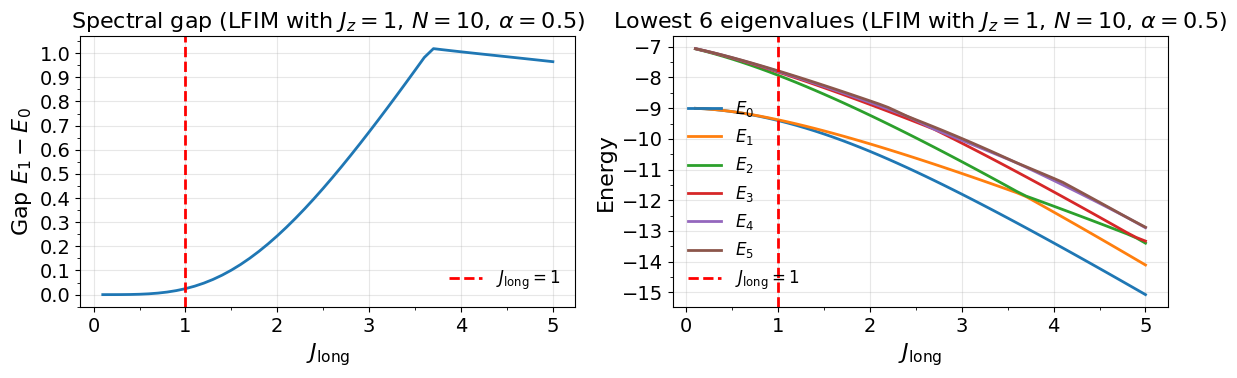

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

indices = range(1, 51)   # TFIM1Ham .. TFIM10Ham
gaps = []
spectra = []   # to store lowest eigenvalues

for idx in indices:
    gap, lowest_4 = compute_gap(idx, phys_N=10)
    gaps.append(gap)
    spectra.append(lowest_4)   # save the spectrum

parameter = np.array(indices) / 10
spectra = np.array(spectra)   # shape: (num_indices, 4)


plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "lines.linewidth": 2,
    "lines.markersize": 5,
})

fig, axes = plt.subplots(1, 2, figsize=(12,4))  # 1 row, 2 columns

# --- Left panel: gap ---
ax = axes[0]
ax.plot(parameter, gaps, linestyle="-", color="C0")
ax.axvline(x=1, color="red", linestyle="--", linewidth=2, label=r"$J_{\mathrm{long}}=1$")
ax.set_xlabel(r"$J_{\mathrm{long}}$")
ax.set_ylabel(r"Gap $E_1 - E_0$")
ax.set_title(r"Spectral gap (LFIM with $J_z=1, \, N=10, \, \alpha=0.5$)")
ax.legend(frameon=False, loc="best")
ax.grid(True, alpha=0.3)

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

# --- Right panel: spectrum ---
ax = axes[1]
for i in range(spectra.shape[1]):
    ax.plot(parameter, spectra[:, i], linestyle="-", label=rf"$E_{i}$")
ax.axvline(x=1, color="red", linestyle="--", linewidth=2, label=r"$J_{\mathrm{long}}=1$")
ax.set_xlabel(r"$J_{\mathrm{long}}$")
ax.set_ylabel("Energy")
ax.set_title(r"Lowest 6 eigenvalues (LFIM with $J_z=1, \, N=10, \, \alpha=0.5$)")
ax.legend(frameon=False, loc="best")
ax.grid(True, alpha=0.3)

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

plt.tight_layout()
plt.savefig("LFIMa05_combined.pdf")   # save as one PDF
plt.show()



In [109]:
import numpy as np
import os
ns=10
def compute_gap(index, phys_N=ns, base_path=r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\ED"):
    """
    Compute the spectral gap (E2 - E0) for TFIM Hamiltonian with given index.

    Parameters
    ----------
    index : int
        File index, e.g. 1 -> TFIM1Ham.txt
    phys_N : int
        Number of spins in the system (default=6)
    base_path : str
        Path to directory containing TFIM*.txt files

    Returns
    -------
    gap : float
        Energy gap (E2 - E0)
    lowest_4 : np.ndarray
        The lowest 4 eigenvalues
    """
    file_path = os.path.join(base_path, f"LFIMLRa05entire{index}Ham.txt")

    # Load data (row, col, val)
    data = np.loadtxt(file_path, dtype=float)
    rows = data[:,0].astype(int)
    cols = data[:,1].astype(int)
    vals = data[:,2]

    # Hilbert space dimension
    dim = 2**phys_N
    M = np.zeros((dim, dim))
    M[rows, cols] = vals

    # Diagonalize
    evals, _ = np.linalg.eigh(M)
    evals = np.sort(evals)
    lowest_4 = evals[:10]

    gap = lowest_4[1] - lowest_4[0]
    return gap, lowest_4

# Example: loop over multiple files
# for idx in range(1, 101):  # TFIM1Ham.txt, TFIM2Ham.txt, TFIM3Ham.txt
#     gap, lowest_4 = compute_gap(idx, phys_N=ns)
#     print(f"LFIMLRa05entire{idx}Ham: gap = {gap:.6f}, lowest 4 eigenvalues = {lowest_4}")



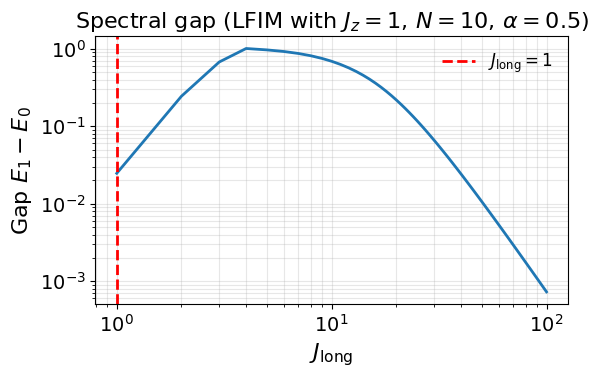

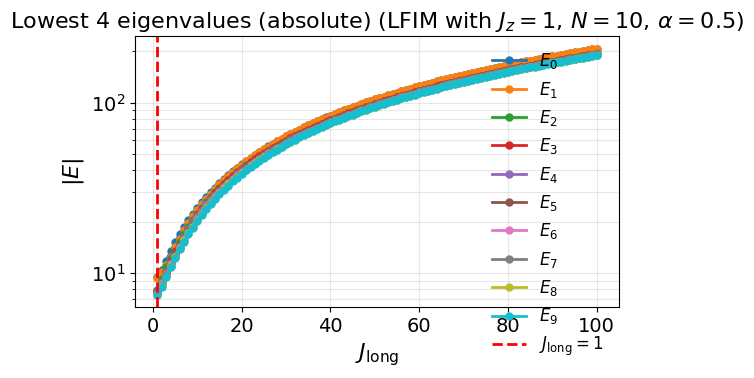

In [110]:
import matplotlib.pyplot as plt
import numpy as np

indices = range(1, 101)   # TFIM1Ham .. TFIM100Ham
gaps = []
spectra = []   # to store lowest eigenvalues

for idx in indices:
    gap, lowest_4 = compute_gap(idx, phys_N=10)
    gaps.append(gap)
    spectra.append(lowest_4)   # save the spectrum

parameter = np.array(indices) / 1
spectra = np.array(spectra)   # shape: (num_indices, 4)

plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "lines.linewidth": 2,
    "lines.markersize": 5,
})

# --- Plot gap (log-log) ---
plt.figure(figsize=(6,4))
plt.loglog(parameter, gaps, linestyle="-", color="C0",)
plt.axvline(x=1, color="red", linestyle="--", linewidth=2, label=r"$J_{\mathrm{long}}=1$")
plt.xlabel(r"$J_{\mathrm{long}}$")
plt.ylabel(r"Gap $E_1 - E_0$")
plt.title(r"Spectral gap (LFIM with $J_z=1, \, N=10, \, \alpha=0.5$)")
plt.legend(frameon=False, loc="best")
plt.grid(True, which="both", alpha=0.3)  # both major and minor grid
plt.tight_layout()
plt.show()

# --- Plot spectrum (lowest 4 levels, log-log, absolute value) ---
plt.figure(figsize=(6,4))
for i in range(spectra.shape[1]):
    plt.semilogy(parameter, np.abs(spectra[:, i]), linestyle="-", marker="o", label=rf"$E_{i}$")
plt.axvline(x=1, color="red", linestyle="--", linewidth=2, label=r"$J_{\mathrm{long}}=1$")
plt.xlabel(r"$J_{\mathrm{long}}$")
plt.ylabel(r"$|E|$")
plt.title(r"Lowest 4 eigenvalues (absolute) (LFIM with $J_z=1, \, N=10, \, \alpha=0.5$)")
plt.legend(frameon=False, loc="best")
plt.grid(True, which="both", alpha=0.3)
plt.tight_layout()
plt.show()



## Trials

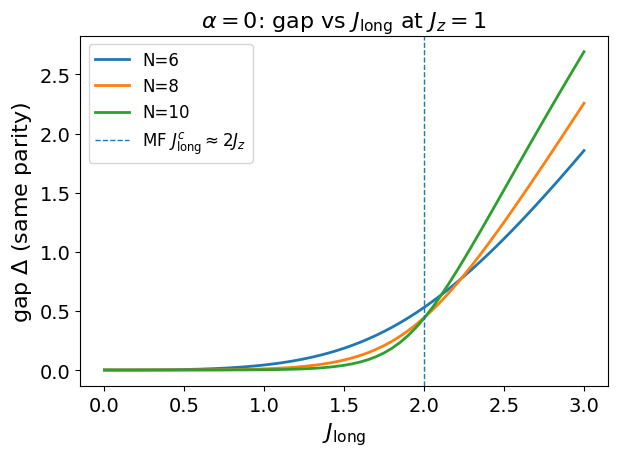

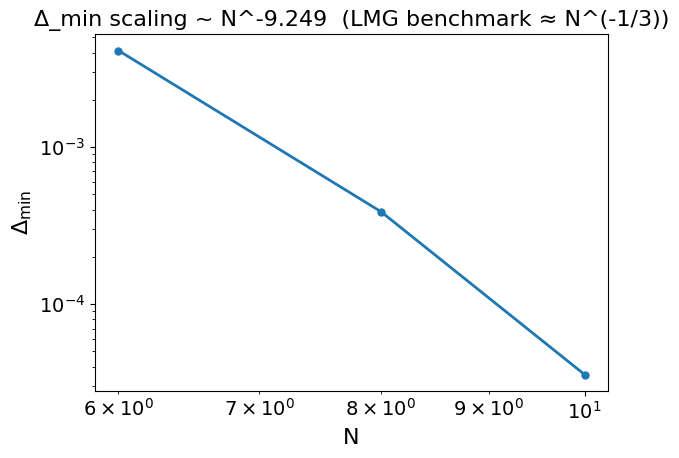

Min-gap locations:
N= 6 : J_long* ≈ 0.500,  Δ_min ≈ 0.00411934
N= 8 : J_long* ≈ 0.500,  Δ_min ≈ 0.000387845
N=10 : J_long* ≈ 0.500,  Δ_min ≈ 3.56059e-05


: 

In [ ]:
# Jz–Jlong (alpha=0) model: H = -Jz * sum ZZ  - (2*Jlong/N) * Sx^2   (up to a constant)
# Computes the gap within the *same parity sector* as the ground state.

import numpy as np
import matplotlib.pyplot as plt

# ---------- utilities ----------
def kron_all(mats):
    out = mats[0]
    for M in mats[1:]:
        out = np.kron(out, M)
    return out

def bitcount(x):
    # population count of integer x
    return x.bit_count()  # Python 3.8+; else use bin(x).count("1")

# ---------- build operators ----------
def build_XZ(N):
    """Return lists [X_i], [Z_i] as dense 2^N x 2^N NumPy arrays (dtype=float)."""
    sx = np.array([[0., 1.],
                   [1., 0.]], dtype=float)
    sz = np.array([[1., 0.],
                   [0.,-1.]], dtype=float)
    I  = np.eye(2, dtype=float)

    X = [kron_all([sx if j==i else I for j in range(N)]) for i in range(N)]
    Z = [kron_all([sz if j==i else I for j in range(N)]) for i in range(N)]
    return X, Z

def build_Sx2_and_Hzz(N, X, Z, periodic=True):
    """Return Sx^2 and sum_i Z_i Z_{i+1} (periodic if True)."""
    # collective Sx
    Sx = 0.5 * sum(X)
    Sx2 = Sx @ Sx

    # nearest-neighbor ZZ
    Hzz = np.zeros_like(Sx2)
    for i in range(N-1):
        Hzz += Z[i] @ Z[i+1]
    if periodic and N > 2:
        Hzz += Z[N-1] @ Z[0]
    return Sx2, Hzz

def parity_diag(N):
    """Return the diagonal of P = ∏_i σ^z_i as a length-2^N vector of ±1."""
    dim = 1 << N
    Pdiag = np.empty(dim, dtype=float)
    for s in range(dim):
        # σ^z eigenvalue is +1 for |0>, -1 for |1>; product -> (-1)^(# of 1s)
        Pdiag[s] = -1.0 if (bitcount(s) % 2) else 1.0
    return Pdiag

def same_parity_gap(evals, evecs, Pdiag, tol=1e-10):
    """Gap to the lowest *same-parity* excitation (avoid crossing sectors)."""
    psi0 = evecs[:, 0]
    p0 = float(np.sum(Pdiag * np.abs(psi0)**2))
    p0 = +1.0 if p0 >= 0 else -1.0
    E0 = evals[0]
    # find first excited with same parity expectation sign
    for k in range(1, len(evals)):
        psik = evecs[:, k]
        pk = float(np.sum(Pdiag * np.abs(psik)**2))
        pk = +1.0 if pk >= 0 else -1.0
        if abs(pk - p0) < tol:
            return evals[k] - E0
    return np.nan  # shouldn't happen

# ---------- main computations ----------
def gap_vs_Jlong(N, Jz=1.0, Jvals=np.linspace(0.0, 3.0, 61), periodic=True):
    X, Z = build_XZ(N)
    Sx2, Hzz = build_Sx2_and_Hzz(N, X, Z, periodic=periodic)
    Pdiag = parity_diag(N)

    gaps = np.empty_like(Jvals, dtype=float)
    for idx, Jlong in enumerate(Jvals):
        # H = -Jz * sum ZZ  - (2 * Jlong / N) * Sx^2   (drop constants)
        H = -Jz * Hzz - (2.0 * Jlong / N) * Sx2
        evals, evecs = np.linalg.eigh(H)
        gaps[idx] = same_parity_gap(evals, evecs, Pdiag)
    return gaps

if __name__ == "__main__":
    # --- Parameters ---
    Jz = 1.0
    Jvals = np.linspace(0.0, 3.0, 61)
    Ns_to_plot = [6, 8, 10]        # keep modest; dense ED scales like 2^N

    # --- Gap vs J_long curves ---
    for N in Ns_to_plot:
        gaps = gap_vs_Jlong(N, Jz, Jvals, periodic=True)
        plt.plot(Jvals, gaps, label=f"N={N}")
    # mean-field (product-state) critical estimate: J_long^c ≈ 2 Jz
    plt.axvline(2*Jz, ls="--", lw=1, label=r"MF $J_{\rm long}^c \approx 2J_z$")
    plt.xlabel(r"$J_{\rm long}$")
    plt.ylabel(r"gap $\Delta$ (same parity)")
    plt.title(r"$\alpha=0$: gap vs $J_{\rm long}$ at $J_z=1$")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Optional: finite-size scaling of the minimum gap ---
    Ns_scale = [6, 8, 10]
    Dmins, Jstars = [], []
    for N in Ns_scale:
        Jscan = np.linspace(0.5, 2.8, 61)  # focus where the dip is
        gaps = gap_vs_Jlong(N, Jz, Jscan, periodic=True)
        k = int(np.nanargmin(gaps))
        Dmins.append(gaps[k]); Jstars.append(Jscan[k])
    Ns = np.array(Ns_scale, float)
    Dmins = np.array(Dmins)

    plt.loglog(Ns, Dmins, 'o-')
    # fit log Δ_min = a log N + b
    A = np.vstack([np.log(Ns), np.ones_like(Ns)]).T
    a, b = np.linalg.lstsq(A, np.log(Dmins), rcond=None)[0]
    plt.title(f"Δ_min scaling ~ N^{a:.3f}  (LMG benchmark ≈ N^(-1/3))")
    plt.xlabel("N"); plt.ylabel(r"$\Delta_{\min}$")
    plt.tight_layout(); plt.show()

    # Print the locations of the minima
    print("Min-gap locations:")
    for N, Jstar, Dmin in zip(Ns_scale, Jstars, Dmins):
        print(f"N={N:2d} : J_long* ≈ {Jstar:.3f},  Δ_min ≈ {Dmin:.6g}")
